In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import Labels

In [2]:
dataset_dir = 'test/'
labels = pd.read_csv(dataset_dir + 'labels.csv')

In [3]:
labels

,filename,crosstrack,heading,downtrack,leftx1,lefty1,leftx2,lefty2,rightx1,righty1,rightx2,righty2
0,0.png,-4.696942,13.343558,702.210350,1215.266488,547.294204,1118.624214,560.531152,1262.224477,547.324288,1321.604604,561.289903
1,1.png,-1.367467,28.841290,702.210350,1576.941684,546.837002,1481.916315,561.291604,1635.388826,546.880297,1736.407504,563.002040
2,2.png,1.619943,-12.857306,726.035087,690.942170,548.385482,607.228008,564.907113,738.758077,548.388627,839.347988,564.309086
3,3.png,-6.173316,15.627880,726.035087,1260.389933,547.331818,1136.102317,562.963340,1309.781224,547.366021,1372.833823,564.106826
4,4.png,0.925071,27.773464,756.790924,1552.034269,547.080844,1430.448611,568.362290,1613.744286,547.131301,1794.776006,571.776712
5,5.png,4.637244,-24.109371,756.790924,443.134850,549.034524,343.214043,571.887281,499.449277,549.014738,663.221165,569.615757
6,6.png,7.533653,25.400284,772.934155,1505.380698,547.246956,1433.494145,572.294698,1566.377138,547.298035,1858.903511,576.566332
7,7.png,-7.153142,23.338466,772.934155,1428.134951,547.161251,1222.231904,569.792100,1485.991554,547.206505,1584.394072,573.097975
8,8.png,6.954406,-20.288374,777.282338,536.265578,548.854712,446.890937,575.319835,591.132644,548.842885,803.794146,572.804684
9,9.png,9.777013,3.700788,777.282338,1038.647523,547.906833,992.558809,572.197663,1088.028353,547.932120,1329.953291,573.017635


In [4]:
labels.loc[labels['filename'] == '0.png'].iloc[0]['rightx1']

1262.224477

# Visualize Lines

In [8]:
def get_pixels(line, sw):
    a, b, c = line
    xs = np.arange(0, sw, 1)
    ys = [-(a / b) * x + (-c / b) for x in xs]
    return xs, ys

def plot_image_with_label(dataset_dir, filename):
    # Load the image
    img = np.array(cv2.cvtColor(cv2.imread(dataset_dir + filename), cv2.COLOR_BGRA2BGR)[:, :, ::-1])
    # Get the lines for plotting
    data = labels.loc[labels['filename'] == filename].iloc[0]
    rightx1, righty1, rightx2, righty2 = data['rightx1'], data['righty1'], data['rightx2'], data['righty2']
    leftx1, lefty1, leftx2, lefty2 = data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']
    right_line = np.cross(
        np.array([rightx1, righty1, 1]), np.array([rightx2, righty2, 1]))
    left_line = np.cross(
        np.array([leftx1, lefty1, 1]), np.array([leftx2, lefty2, 1]))
    sw = img.shape[1]
    xright, yright = get_pixels(right_line, sw)
    xleft, yleft = get_pixels(left_line, sw)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    # plt.scatter([x1, x2], [y1, y2], c='red')
    # plt.scatter([x3, x4], [y3, y4], c='red')
    plt.plot(xright, yright, c='lime', linewidth=2.0)
    plt.plot(xleft, yleft, c='lime', linewidth=2.0)
    # plt.axis('off')


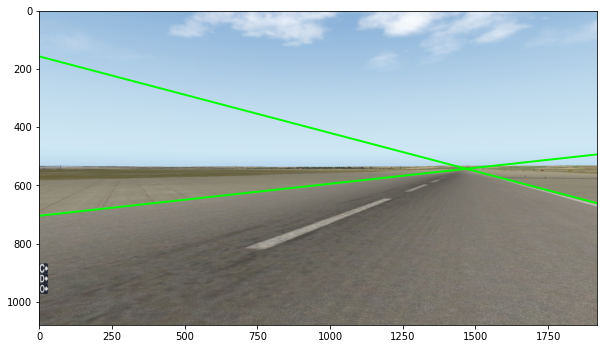

In [9]:
plot_image_with_label(dataset_dir, '7.png')